Tasks:
- EDA VNINDEX
- EDA FPT
- EDA CII
- Compare and Conclusion

Stakeholders:
- Investors/Traders: Simplicity, clear signals
  + Price trend (bullish/bearish phases)
  + Entry/exit points (moving averages, drawdowns)
  + Risk of extrem losses (VaR, max drawdown)
  + Seasonal or event patterns (earnings days, Monday effects)
  
- Portfolio managers/Institutional investors: Risk-adjusted performance & portfolio context
  + Sharpe/Sortino ratio vs benchmark
  + Correlation with indices and other stocks (diversification)
  + Volatility clustering => hedging needs
  + Contribution to portfolio risk & return
  
- Risk managers: Downside protection, stress testing
  + Value at Risk (Var) and Conditional VaR
  + Worst drawdowns and recovery times
  + Volume spikes + volatility surges => systemic stress signals
  + Scenario analtysis (2008-style crash, COVID crash)
  
- Quant researchers/Analysts: Statistical properties for models
  + Return distribution skewness, kurtosis
  + ACF/PACF for returns and sqared returns
  + Seasonality and regime shifts
  + Structural breaks (after regulation changes...)
  
- Executives: Market perception & Investment sentiment
  + Volume spikes around announcements => Investor reaction
  + Long-term price trend vs sector bench mark => competitiveness
  + Volatility pattern => how "risky" the firm is perceived
  + Correlation with macro events => exposure to economy

- Regulators: Market integrity & Fairness
  + Abnormal price-volume spikes (insider trading suspicion)
  + Excessive volatility without news
  + Market manipulation detection (pump-and-dump signals)
  
Insights to be figured:
- Basic trend & Volatility
- Return distribution
- Drawdown history
- Correlation (currently not available, too small portfolio)
- Volume dynamics
  
Others:
- Seasonality effects
- Event patterns (not available)
- Regime shifts (crises, regulations => Later)
- Anomalies: Unexpected spike with no obvious news -> worth deeper investigation

#### **A. Import and Load data**

In [1]:
# General
from vnstock import Quote
import pandas as pd
import numpy as np
import datetime
import sys
import os

# Statistics
import scipy.stats as stats
from scipy.stats import norm
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller, kpss

# Visualization
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
sns.set()

# utils
sys.path.append(os.path.abspath('..'))
from src.utils import get_data

In [47]:
# Config
START_DATE = "2007-01-01"
END_DATE = datetime.date.today().strftime('%Y-%m-%d')
PORTFOLIO = ['FPT', 'CII']
# Dataset link: https://data.mendeley.com/datasets/kc5znhxwxv/2
FREE_RISK_PATH = os.path.join(os.path.abspath('..'), 'data', 'Risk free rate in Vietnam market', 'RF93.xlsx') # Not yet know a risk free bond in Vietnam, take from secondary data, limitation of date range

In [48]:
# Get risk free
rf = get_data.get_risk_free(FREE_RISK_PATH)
rf

0

In [4]:
# stocks data frame
# VNINDEX
df_VNINDEX = get_data.get_stock('VNINDEX', START_DATE, END_DATE)

# Portfolio
df_FPT = get_data.get_stock(PORTFOLIO[0], START_DATE, END_DATE)
df_CII = get_data.get_stock(PORTFOLIO[1], START_DATE, END_DATE)

In [5]:
df_VNINDEX.shape, df_CII.shape, df_FPT.shape

((4651, 8), (4663, 8), (4663, 8))

#### **B. EDA**

##### **I. VNINDEX (For trainning and experimenting)**

*1. Data structure*

In [6]:
df_VNINDEX.head()

,time,open,high,low,close,volume,return,log_return
1,2007-01-03,745.13,757.71,745.13,757.71,4114170,0.022178,0.021936
2,2007-01-04,784.45,788.82,784.45,788.82,5628890,0.041058,0.040237
3,2007-01-05,818.04,818.04,816.51,816.51,7845670,0.035103,0.034501
4,2007-01-08,840.22,840.22,825.11,825.11,8191130,0.010533,0.010478
5,2007-01-09,845.26,845.26,840.89,844.91,7979270,0.023997,0.023713


In [7]:
df_VNINDEX.isna().sum()

time          0
open          0
high          0
low           0
close         0
volume        0
return        0
log_return    0
dtype: int64

Data has been handled (missing, adjusted data).

In [8]:
df_VNINDEX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4651 entries, 1 to 4651
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   time        4651 non-null   datetime64[ns]
 1   open        4651 non-null   float64       
 2   high        4651 non-null   float64       
 3   low         4651 non-null   float64       
 4   close       4651 non-null   float64       
 5   volume      4651 non-null   int64         
 6   return      4651 non-null   float64       
 7   log_return  4651 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 290.8 KB


In [9]:
df_VNINDEX.describe(include='number')

,open,high,low,close,volume,return,log_return
count,4651.000000,4651.000000,4651.000000,4651.000000,4.651000e+03,4651.000000,4651.000000
mean,808.102434,813.229179,802.432430,807.895818,2.496943e+08,0.000487,0.000173
std,334.941502,336.765187,332.247695,334.705083,3.086724e+08,0.027488,0.024609
min,236.570000,236.700000,234.660000,235.500000,0.000000e+00,-0.545923,-0.789489
25%,504.690000,506.910000,501.905000,504.360000,4.126532e+07,-0.005836,-0.005853
50%,752.750000,761.860000,750.100000,757.940000,1.176641e+08,0.000939,0.000938
75%,1068.980000,1075.335000,1060.555000,1066.790000,3.909840e+08,0.007341,0.007314
max,1705.130000,1711.490000,1678.570000,1696.290000,2.698902e+09,1.204785,0.790630


*2. Price-level analysis*

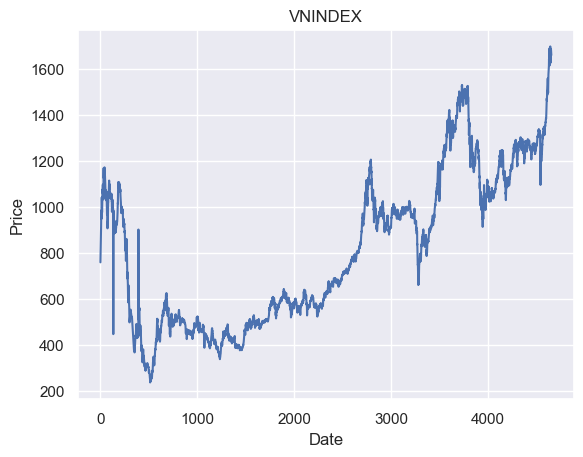

In [10]:
plt.plot(df_VNINDEX['close'])
plt.title('VNINDEX')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

- Some very pointy peak
- There is a drop in the early stage, around 500 first date_id, 2007-2009 (context check).
- A rising trend afterward.

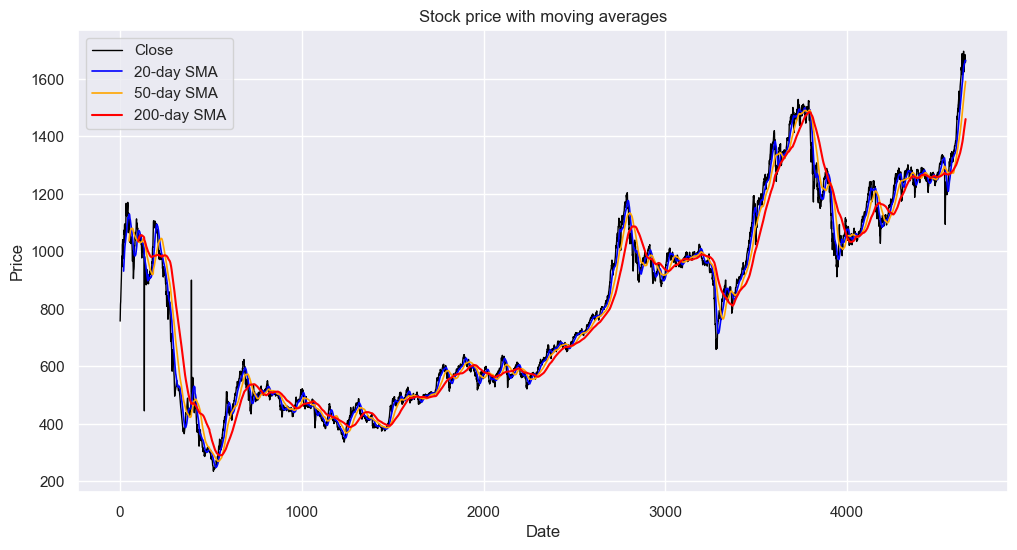

In [11]:
# Overlaying moving average visualization
df_VNINDEX['SMA20'] = df_VNINDEX['close'].rolling(window=20).mean()
df_VNINDEX['SMA50'] = df_VNINDEX['close'].rolling(window=50).mean()
df_VNINDEX['SMA200'] = df_VNINDEX['close'].rolling(window=100).mean()

plt.figure(figsize=(12,6))
plt.plot(df_VNINDEX['close'], label='Close', color='black', linewidth=1)
plt.plot(df_VNINDEX['SMA20'], label='20-day SMA', color='blue', linewidth=1.2)
plt.plot(df_VNINDEX['SMA50'], label='50-day SMA', color='orange', linewidth=1.2)
plt.plot(df_VNINDEX['SMA200'], label='200-day SMA', color='red', linewidth=1.5)

plt.title("Stock price with moving averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

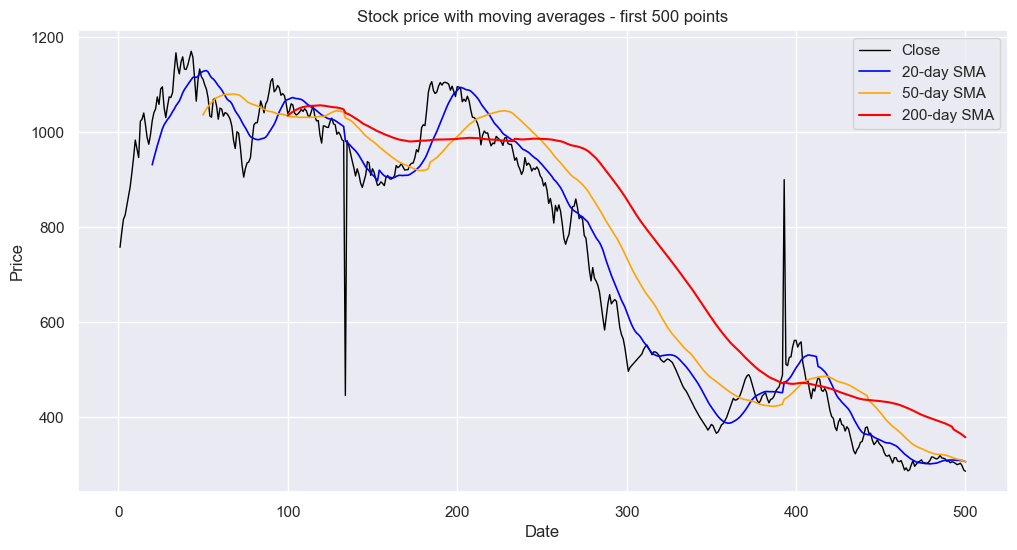

In [12]:
# First stage
plt.figure(figsize=(12,6))
plt.plot(df_VNINDEX['close'][:500], label='Close', color='black', linewidth=1)
plt.plot(df_VNINDEX['SMA20'][:500], label='20-day SMA', color='blue', linewidth=1.2)
plt.plot(df_VNINDEX['SMA50'][:500], label='50-day SMA', color='orange', linewidth=1.2)
plt.plot(df_VNINDEX['SMA200'][:500], label='200-day SMA', color='red', linewidth=1.5)

plt.title("Stock price with moving averages - first 500 points")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In the first stage (500 first points from 01-01-2007):  
Overall trend:  
- 200-day SMA sloping downard for most of the chart => Long-term trend is bearish.
- When the price stays under the red line for a long time (e.g: 250-380), it means the sstock is in a down trend.
  
Short vs long averages:
- The 20-day SMA reacts fast to price, so it whips up and down quickly after there is a change in price direction.
- The 50-day SMA is smoother, show somewhat a longer trend.
- Crossovers between blue/orange and the red line:
  + Golden cross (short average goes above long average) => bullish signal (recent average got higher => better performace => Price rise signal)
  + Death cross (shrot average goes below long average) => bearish signal (recent average got lower => poor performace => Price fall signal)
  + Sometimes 20-day crosses the orrage quickly, but the red line doesn't confirm (no signal) => False signals
  + Stronger siganls happen when short MA crosses long MA in the same dirction as the red trend => Most of the time red line direction is downward or near flat, some golden cross happened in a very short period.
  
Volatitlity/Noise:
- Sharp vertical drops/spikes in the black line = sudden market events (earnings, news).
- After big shocks, blue SMA snaps quickly, but the red SMA barely reacts.

**Insights:**
- Long-term outlook is bearish.
- There were a couple of short-term cross but did not sustain above the red line.
- Those spikes in price didn't change the downward momentum, because volume or fundamentals likely didn't support the move (news did not have long term-impact, check event around March-May 2007, Jan-March 2008).

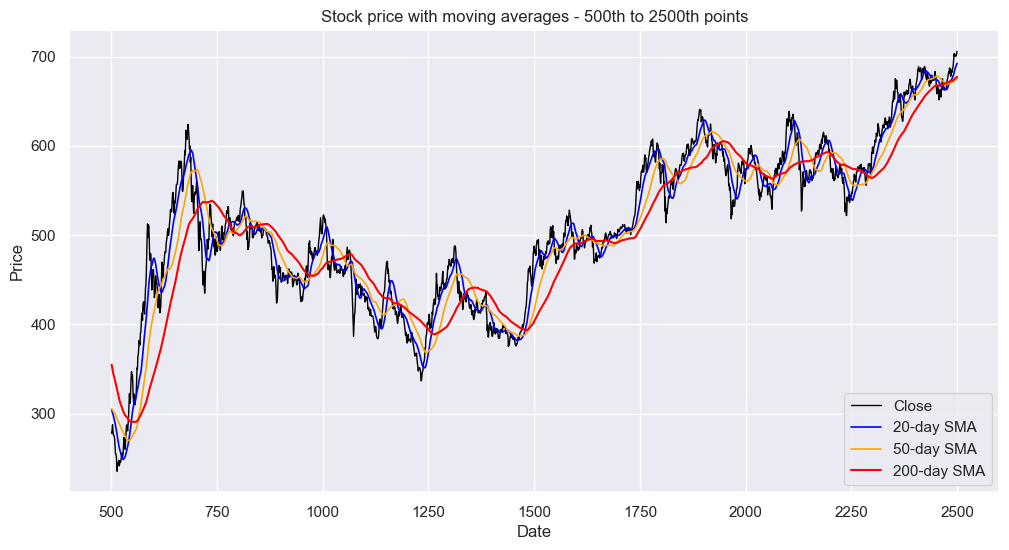

In [13]:
# Second stage
plt.figure(figsize=(12,6))
plt.plot(df_VNINDEX['close'][500:2500], label='Close', color='black', linewidth=1)
plt.plot(df_VNINDEX['SMA20'][500:2500], label='20-day SMA', color='blue', linewidth=1.2)
plt.plot(df_VNINDEX['SMA50'][500:2500], label='50-day SMA', color='orange', linewidth=1.2)
plt.plot(df_VNINDEX['SMA200'][500:2500], label='200-day SMA', color='red', linewidth=1.5)

plt.title("Stock price with moving averages - 500th to 2500th points")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In the second stage (500th to 2500th-about 6 years):  
Overall trend:  
- 200-day SMA had strong upward trend in the first 250 trading days, then a slow downward trend before go backs to a long-term upward trend  
- For the later down and up trends, both were slightly fluctuated updown along the trend => Indicate possible seasonality. 
  
Short averages vs long averages:
- First 250 points showed a golden cross since most of the short-term MA was above the long-term MA + In the direction of the red line => Bullish signals
- After 250 points, crosses occured more frequently showing fluctuation, periods after death cross (50-day sma below 200-day sma) tended to last longer than after golden cross before the 1200th point => Downward trend.
- The oposite for after the 1200th point, with very short bearish period and several bullish period => Faster upward trend
- After the 1200th point, price mostly stayed above the red line => positive momentum
- Some time it went below the redline => weakness
  
Volatitlity\Noise:
- Blue and orange line hug closely witht he price line, the gap is not too large => Relatively low volatility.
  
**Insights:**
- Strong bullish period at first, a slow downward trend after ward with constantly fluctualtion, then a faster upward trend.
- Fluctuation seems seasonal (Check later).
- Price in this period had relatively low volatility and relatively strong momentum in the later phase.
- Context decision: at the later phase should be long call and should not over react with weakness (not applied to current time frame)

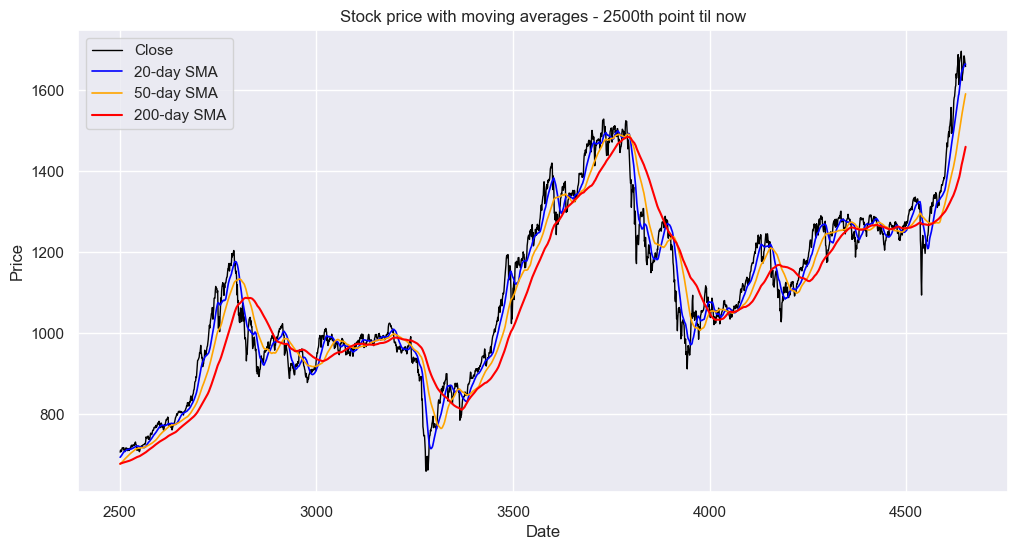

In [14]:
# Third stage
plt.figure(figsize=(12,6))
plt.plot(df_VNINDEX['close'][2500:], label='Close', color='black', linewidth=1)
plt.plot(df_VNINDEX['SMA20'][2500:], label='20-day SMA', color='blue', linewidth=1.2)
plt.plot(df_VNINDEX['SMA50'][2500:], label='50-day SMA', color='orange', linewidth=1.2)
plt.plot(df_VNINDEX['SMA200'][2500:], label='200-day SMA', color='red', linewidth=1.5)

plt.title("Stock price with moving averages - 2500th point til now")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In the third stage (2500th til now):  
Overall trend:
- Stock is in a long-term uptrend
- There are several upward slopes in the 200-day SMA => bullish.
- Between these upward period there are corrections reacting to overvalue in the market but the price then recover strongly.
  
Short averages vs long averages:
- 20-day reacts the fastes while hugging the price closely => useful for short-term entry/exit
- 50-day smoother, acts as dynamic support in uptrends.
- In around 3300, price fell heavily below the red ine but quickly rebounded => False breakdown (weakness but not a true reversal)
  
Volatility:
- Some sharp spikes\drops => earnings announcements or external shocks (check 3300, 3800, 4200, 4600 - Jan-Mar 2020, Jan-Mar 2022, Q4 2023, Q3 2025 or 2 months ago)
  
**Insights:**
- Long-term hold.
- Corrections: can be deep, stop-loss levels may need flexibility to handle false weakness trap.


This is VNINDEX analysis, not a specific stock, this only give expectation of the overal market trend, recently, strong upward trend with correspondedly long correction periods.

In [15]:
# Stationarity  (mean, var, autocorrelation remain constant over time)
# ADF test (for unit root): H0: non-stationary, H1: stationary
# p-value < 0.05 => reject H0 => stationary
# p-value > 0.05 => fail to reject H0 => non-stationary
# test whether prices follow a random walk

# KPSS test (trend stationarity): H0: stationary, H1: non-stationary
# p-value < 0.05 => reject H0 => non-stationary
# p-value > 0.05 => fail to reject H0 => stationary
# used as a complement to ADF

# ADF
adf_result = adfuller(df_VNINDEX['close'])
print(f"ADF test: {adf_result[1]}")

print()

# KPSS
kpss_result = kpss(df_VNINDEX['close'], regression='c')
print(f"KPSS test: {kpss_result[1]}")


ADF test: 0.9483578451706471

KPSS test: 0.01


The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.



ADF: non-stationary, KPSS: non-stationary => Price definitely not stationary.

- Statistical models assume stationarity (ARMA, ARIMA, ARCH, GARCH, VAR) require mean/variance/covariance structure to be stable over time => Non stationary = meaningless parameter estimates
- Stationary series has stable properties => Learn from history apply to future
- Non statioonary drifts upward => Hard to forecast
- Regression one non-stationary seriese on another can give fake high R2 => relationship are actually meaningless

When data is definitely non-stationary => Transform:  
- Differencing: d_P = Pt - Pt-1 (returns, ... highly stationary)
- Detrending: if sereiese has deterministic trend, subtract the trend line.
- Log transform: stabilizes variance
- Cointegration models: two non-stationary serier move together (pair trading) => model these two stationary relation ship. 

=> May be only use the most recent stage, later check for that for short near forecast.  
=> Since there is unit-root test show non-stationary => Shock cause long-term effect => May some how capture this effect.  
=> If returns are stationary => Still can model up down prob rate with regression models.

*3. Return analysis*

In [16]:
df_VNINDEX.describe(include='number')[['return', 'log_return']]

,return,log_return
count,4651.000000,4651.000000
mean,0.000487,0.000173
std,0.027488,0.024609
min,-0.545923,-0.789489
25%,-0.005836,-0.005853
50%,0.000939,0.000938
75%,0.007341,0.007314
max,1.204785,0.790630


- Mean(log returns) approx Mean(simple returns) - 1/2 * Var(simple returns) (1) and the higher the close price gap the more different between simple return and correspond log return(2).
- Since there is high different between mean log return and simple return, this indicates high votality (~std 2.7%, compare to ~medium 0.01% ) (1) or extreme spikes (2)  
- Median of return is twice as high as mean. Return distribution is heavily distored, may be left-skewed.

In [17]:
# Stage 1 descriptive
df_VNINDEX.iloc[:500].describe(include='number')[['return', 'log_return']]

,return,log_return
count,500.000000,500.000000
mean,0.000356,-0.001904
std,0.075690,0.065717
min,-0.545923,-0.789489
25%,-0.015290,-0.015408
50%,-0.002304,-0.002306
75%,0.011494,0.011428
max,1.204785,0.790630


Down trend but near 0 value => Positive mean return.

<Axes: >

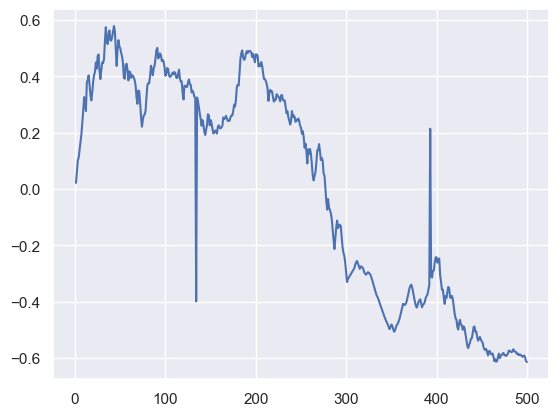

In [18]:
# Cumulative return
cum_return = (1 + df_VNINDEX.iloc[:500]['return']).cumprod() - 1
cum_return.plot()

In [19]:
cum_return.mean()

np.float64(0.0006291904434285982)

The first gain and the second half of loss wiped out each other causing near 0 mean.

In [20]:
# Stage 2 descriptive
df_VNINDEX.iloc[500:2500].describe(include='number')[['return', 'log_return']]

,return,log_return
count,2000.000000,2000.000000
mean,0.000539,0.000452
std,0.013245,0.013253
min,-0.058717,-0.060512
25%,-0.006268,-0.006288
50%,0.000723,0.000723
75%,0.007745,0.007715
max,0.047629,0.046530


Mean and median pretty close here so this stage was rather stable (few extreme values).

In [21]:
# Stage 3 descriptive
df_VNINDEX.iloc[2500:].describe(include='number')[['return', 'log_return']]

,return,log_return
count,2151.000000,2151.000000
mean,0.000468,0.000397
std,0.011892,0.011957
min,-0.066769,-0.069102
25%,-0.004066,-0.004074
50%,0.001361,0.001360
75%,0.006330,0.006310
max,0.067660,0.065469


High median compare to mean so the stage has several extrem values.

<Axes: xlabel='return', ylabel='Count'>

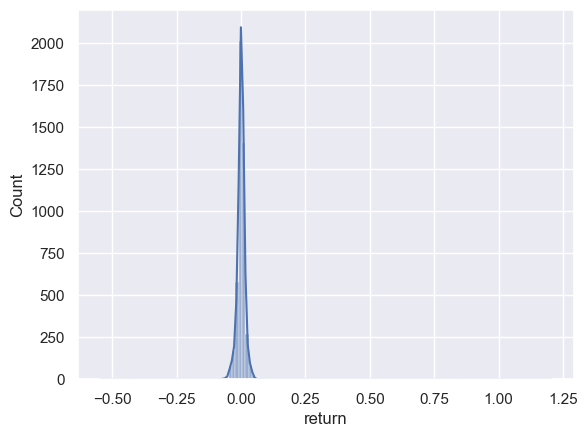

In [22]:
sns.histplot(data=df_VNINDEX['return'], kde=True)

In [23]:
# Variance
print(f"Variance of Return: {df_VNINDEX['return'].var()*100:.4f}%")

Variance of Return: 0.0756%


In [24]:
# Skewness
print(f"Skewness of Return: {df_VNINDEX['return'].skew():.2f}")

Skewness of Return: 21.67


Massive right tail values (positive outliers).

In [25]:
# Kurtosis
print(f"Kurtosis of Return: {df_VNINDEX['return'].kurtosis():.2f}")

Kurtosis of Return: 1025.96


Distribution is extremely peaked.

About data distribution: 
- Data values stay around mean/mode.
- A few gigantic outliers far on the right side.
- Data is extremely right-skewd and has extreme kurtosis, in visualization the distribution seems thin tail, however the contribution of large extreme values compared to below one std (0.27 vs 1.25) and near 0 mean, power of 4 causing seemingly high kurtosis, so kurtosis here confirm existence of extreme values, and plenty distribution into tails.

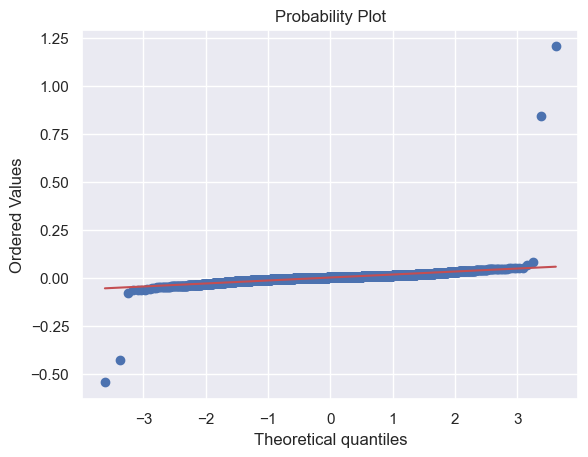

In [26]:
# Q-Q plot
stats.probplot(df_VNINDEX['return'], dist="norm", plot=plt)
plt.show()

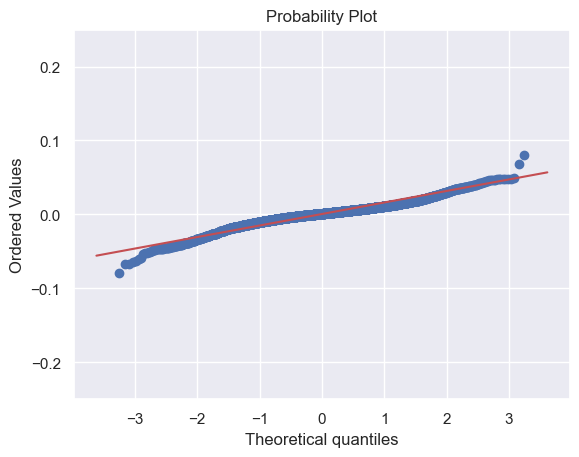

In [27]:
stats.probplot(df_VNINDEX['return'], dist="norm", plot=plt)
plt.ylim(-0.25, 0.25)
plt.show()

Return distribution:
- There are some extreme return in VNINDEX. 
When remove extrem points:
- Left tail points are slightly below but not too much => Left tail is a bit heavier than normal - due to occasionally downtrend (first stage).
- Right tail points are slightly above but not too much => Right tail is a bit heavier than normal - due to deveral occasionally uptrends.
- Leptokurtic pattern (the middle is fine, a but more probability distributed to extreme values than a normal distribution)
- Visualization indeed show heavier tails and extremes sharp peak, the graph stretch to very extreme outliers but the probability mass of these points is very small, close to 0.
Extreme points:
- Sharp spikes (not outliers if there is evidence of event patterns).
- Quick rebounces from spikes (not as extreme but cause heavy tail). 

In [28]:
# Sharpe ratio
sr_VNINDEX = (df_VNINDEX['return'].mean() - rf) / df_VNINDEX['return'].std()
print(f"Sharpe ratio: {sr_VNINDEX:.2f}")

Sharpe ratio: 0.02


In [29]:
# Sortino ratio
sr_VNINDEX = (df_VNINDEX['return'].mean() - rf) / df_VNINDEX[df_VNINDEX['return'] < 0]['return'].std()
print(f"Sortino ratio: {sr_VNINDEX:.2f}")

Sortino ratio: 0.03


In [30]:
# Max drawdown (MDD)
MDD_VNINDEX = ((df_VNINDEX['close'].cummax() - df_VNINDEX['close'])/df_VNINDEX['close'].cummax()).max()
print(f'MDD ratio: {MDD_VNINDEX*100:.2f}%')

MDD ratio: 79.88%


Dangerous to held without hedging.

In [31]:
# ADF
adf_result = adfuller(df_VNINDEX['return'])
print(f"ADF test: {adf_result[1]}")

print()

# KPSS
kpss_result = kpss(df_VNINDEX['return'], regression='c')
print(f"KPSS test: {kpss_result[1]}")

ADF test: 0.0

KPSS test: 0.1


The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.



ADF: stationary  
KPSS: stationary  
=> both stationary in trend and unit root.

=> Regime shifts (returns mean typically stationary, but there is trend that is stationary (typically after stage 1))
=> Data is stationary but volatility clustered => ARCH/GARCH models for returns.

*4. Autocorelation test*

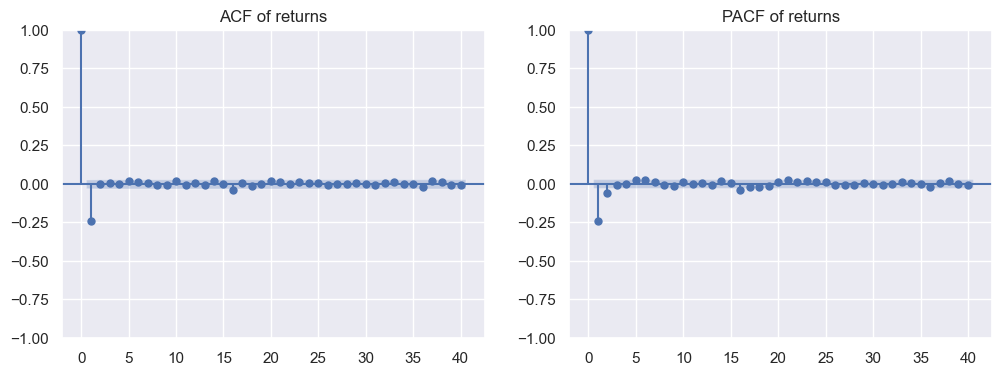

In [32]:
# ACF(Auto correlation function) and PACF(Partial auto correlation function)
# ACF efficient markets: ~ 0 ; positive autocorrelation: momentum/trend ; negative autocorrelation: mean-reversion
# PACF efficient markets: ~ 0 ; positive autocorrelation: momentum/trend ; negative autocorrelation: mean-reversion
# PACF: controls for intermediate lags (For indentify Autoregressive processes)
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plot_acf(df_VNINDEX['return'], lags=40, ax=axes[0])
axes[0].set_title('ACF of returns')
plot_pacf(df_VNINDEX['return'], lags=40, ax=axes[1])
axes[1].set_title('PACF of returns')
plt.show()


- Lag 1: negative => Mean reversion (today up => tomorrow likely down)
- Higher lag close to 0, white noise, no meaningful AR structure.

In [33]:
# Ljung-box test
# H0: no autocorrelation
# H1: autocorrelation
# p-value < 0.05 => reject H0 => autocorrelation
# p-value > 0.05 => fail to reject H0 => no autocorrelation

# Ljung-Box test for returns
lb_result = acorr_ljungbox(df_VNINDEX['return'], lags=[10, 20, 30], return_df=True)
print(f"Retunr: {lb_result}")

print()

# Ljung-Box test for squared returns
lb_result_squared = acorr_ljungbox(df_VNINDEX['return']**2, lags=[10, 20, 30], return_df=True)
print(f"Retunr squared: {lb_result_squared}")

Retunr:        lb_stat     lb_pvalue
10  283.188737  5.529357e-55
20  295.189598  7.751638e-51
30  297.304882  8.988626e-46

Retunr squared:        lb_stat     lb_pvalue
10  197.937634  4.344102e-37
20  197.946234  2.866467e-31
30  197.954246  1.194743e-26


- Auto correlation confirmed statistically since there are a lot of data point, however as shown in plot, auto correlation is not economically significant.
- Squared returns are dependent (autocorrelated - retrun sqared size are all positive and so correlateable) (close day has similar change size that eliminate each other lead to whitenoise patterns for large lag (~0 mean)) => Mean pattern not predictable => Volatility clustering (large changes tend to be followed by large changes, small changes tend to be followed by small changes) (GARCH modeling)

- No linear dependence => Maybe need smoothing
- Variance has dependence => ARCH/GARCH models

ARCH(Autoregressinve conditional hetroskedasticity):  
- Today's volatility depends on past shocks

- Model:  
            rt = mean + et, et ~ N(0, ht)  
              
Where conditianal variance is:  
            ht = a0 + a1 x et-1^2 + a2 x et-2^2 + ... + aq x et-q^2

- q = order of the model (number of lags)
- ht = conditional variance (variance of the next shock)
- et = shock (the next shock)
- rt = return (the next return)
- mean = mean of the return
- et-1, et-2, ... , et-q = past shocks
- a0, a1, a2, ... , aq = parameters
- a0 = constant
- a1, a2, ... , aq = parameters of the past shocks
- a1, a2, ... , aq = parameters of the past shocks
- a1, a2, ... , aq = parameters of the past shocks


Weakness: Needs many lags to capture long memory

GARCH (Generalized ARCH):  
Adds persistence by including past variance:  
ht = a0 + a1 x et-1 ^ 2 +B1 x ht-1  
=> Dynamic programming  
=> a1 + B1 near 1 => very persistent volatility (common)

*5. Risk analysis*

Value at Risk (VaR): at A% confidence, daily VaR = -x%  
=> Lose more than x% at 1-A% of the days.

In [34]:
# Parametric (Normality assumed, Varance-Covariance)
mu = df_VNINDEX['return'].mean()
sigma = df_VNINDEX['return'].std()

confidence = 0.95 # 95% confidence level
z = stats.norm.ppf((1 - confidence)) #z-score for 5% left tail (point where 5% falls below)

VaR_95 = mu + sigma * z
print(f"Parametric 95%: {VaR_95*100:.2f}%")

Parametric 95%: -4.47%


The results may be pessimistic and the probability may be a little bit less than this since a sharp peak distribution is seen, while the distribution still bellshape like (close to Normal distribution)

In [35]:
# Histrorical Simulation
Var_95_hist = np.percentile(df_VNINDEX['return'], 5) # 5% quantile
print(f"Historical 95%: {Var_95_hist*100:.2f}%")

Historical 95%: -2.33%


In [36]:
# Mont Carlo simulation
np.random.seed(42)
simulated = np.random.normal(mu, sigma, size=10000)
VaR_95_mc = np.percentile(simulated, 5)
print(f"Monte Carlo 95% VaR: {VaR_95_mc*100:.2f}%")

Monte Carlo 95% VaR: -4.50%


So for normal assumption: at 95% level, worst case would lose about 4.5 units.  
History says: the worst case in the past was only about 2.3 units.  
The gap  confirm again sharp peak, heavy tail distribution for a 4600 points data.

So the history seems more calm, however in normal assumption case, more forwar-looking, those who do not want to underestimate risk would buffers for rare, more extreme losses that may have not appeared in history.

Expected shortfall (CVaR - Conditional Value at Risk), is a risk measure that quantifies the expected loss in the worst-case scenarios beyond a specific confidence level.  
Calculate varage of all losses that are worse than the VaR threshold, provide a more commprehensive result of tail risk than VaR.  
A% ES would be the average loss in the worst 5% of possible outcomes.

In [37]:
# CVaR
alpha = 5 # 5% worst-case
CVaR_95 = df_VNINDEX[df_VNINDEX['return'] <= VaR_95]['return'].mean()
print(f"95% CVaR: {CVaR_95*100:.2f}%")

95% CVaR: -7.82%


Tail risk analysis, Extreme value theory (POT - peak over threshold): assume heavy tail distribution increase probability of extreme values to occur.

In [38]:
threshold = np.percentile(df_VNINDEX['return'], 5) # Worst 5%
extreme_losses = df_VNINDEX[df_VNINDEX['return'] <= threshold]['return']

print(f"Tail sample size: {len(extreme_losses)}")
print(f"Tail mean: {extreme_losses.mean()*100:.2f}%") 
print(f"Max loss observed: {extreme_losses.min()*100:.2f}%")

Tail sample size: 233
Tail mean: -3.87%
Max loss observed: -54.59%


So historically, when extreme event matter, the mean loss is -3.87% and the most loss is -0.55%.

*6. Seasonality & Event*

In [39]:
# Day-of-week effect
df_VNINDEX['time'] = pd.to_datetime(df_VNINDEX['time'])
df_VNINDEX['day_of_week'] = df_VNINDEX['time'].dt.day_name()

day_mean = df_VNINDEX.groupby('day_of_week')['return'].agg(['mean', 'count']).sort_values(by='mean',ascending=False)
day_mean

,mean,count
day_of_week,,
Saturday,0.841248,1
Wednesday,0.001148,937
Friday,0.001003,933
Tuesday,0.000802,931
Thursday,0.000047,940
Monday,-0.001518,909


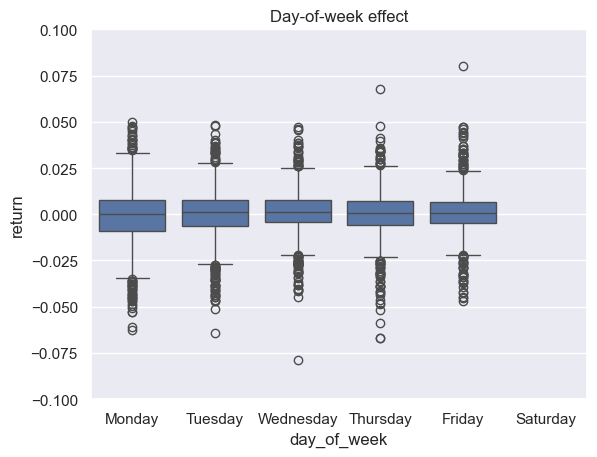

In [40]:
sns.boxplot(x='day_of_week', y='return', data=df_VNINDEX, order=['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday'])
plt.title('Day-of-week effect')
plt.ylim(-0.1, 0.1)
plt.show()

In [41]:
groups = [df_VNINDEX.loc[df_VNINDEX['day_of_week'] == day]['return']*100 for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']]
f_statistic, p_value = stats.f_oneway(*groups)
print(f"F-statistic: {f_statistic}, p-value: {p_value}")

F-statistic: 235.8814141024315, p-value: 4.608714750363348e-225


Saturday can be considered outliers.  
For the 3 middleist days of a week there tend to be higher return while Monday is negative and Tuesday is much smaller than these 3.  
=> Should be considered as feature (Is middle day?, Is Tuesday?, Is Monday?)

In [42]:
# Month of year effect
df_VNINDEX['Month'] = df_VNINDEX['time'].dt.month

month_mean = df_VNINDEX.groupby('Month')['return'].agg(['mean', 'count', 'std'])
month_mean

,mean,count,std
Month,,,
1,0.002315,366,0.015368
2,-0.000156,318,0.015522
3,-0.000569,419,0.014893
4,0.000293,369,0.015481
5,0.000603,390,0.015006
6,0.000194,403,0.012561
7,0.002097,422,0.065704
8,0.002329,418,0.047896
9,-0.000156,367,0.011792


In [43]:
groups_month = [df_VNINDEX.loc[df_VNINDEX['Month'] == month, 'return'] for month in df_VNINDEX['Month'].unique()]
f_statistic_month, p_value_month = stats.f_oneway(*groups_month)   
print(f"F-statistic: {f_statistic_month}, p-value: {p_value_month}")

F-statistic: 0.707048343298431, p-value: 0.7329925585727571


Not significantly different: mean does seem to be differed among months but the variance along within groups maybe high that collapse with each other.

*8. Volume analysis*

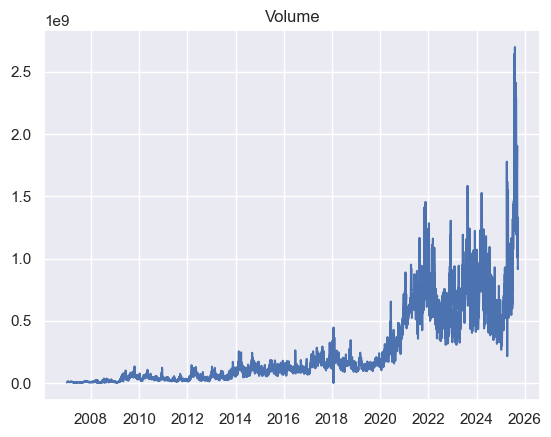

In [44]:
plt.plot(df_VNINDEX['time'], df_VNINDEX['volume'])
plt.title('Volume')
plt.show()

In [45]:
# Detect spikes
threshold = df_VNINDEX['volume'].mean() + 2*df_VNINDEX['volume'].std()
spikes = df_VNINDEX[df_VNINDEX['volume'] > threshold]
print("Volume spikes:\n", spikes[['time', 'volume']])

Volume spikes:
            time      volume
3489 2021-01-19   888174700
3544 2021-04-13   950518900
3547 2021-04-16   920678200
3579 2021-06-04   874131500
3605 2021-07-12   900010700
...         ...         ...
4647 2025-09-15  1242826634
4648 2025-09-16  1330973777
4649 2025-09-17  1071506811
4650 2025-09-18   915010851
4651 2025-09-19   927990635

[228 rows x 2 columns]


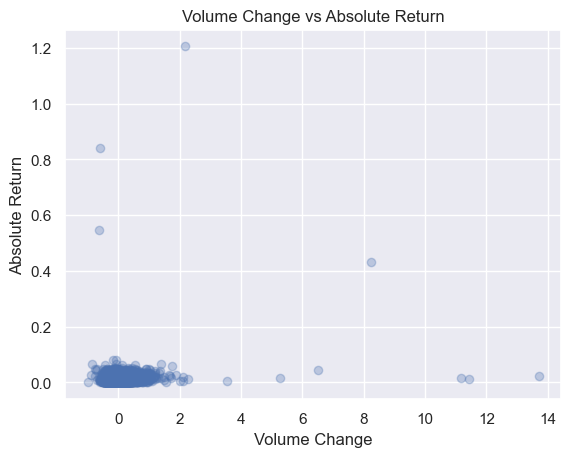

In [ ]:
df_VNINDEX['VolChange'] = df_VNINDEX['volume'].pct_change()
df_VNINDEX['AbsReturn'] = df_VNINDEX['return'].abs()

plt.scatter(df_VNINDEX['VolChange'], df_VNINDEX['AbsReturn'], alpha=0.3)
plt.xlabel("Volume Change")
plt.ylabel("Absolute Return")
plt.title("Volume Change vs Absolute Return")
plt.show()

No relation ship at all

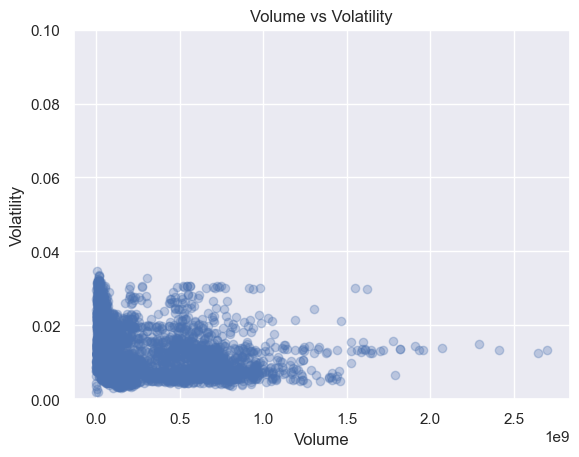

In [ ]:
df_VNINDEX['Volatility'] = df_VNINDEX['return'].rolling(window=20).std()
plt.scatter(df_VNINDEX['volume'], df_VNINDEX['Volatility'], alpha=0.3)
plt.xlabel("Volume")
plt.ylabel("Volatility")
plt.title("Volume vs Volatility")
plt.ylim(0, 0.1)
plt.show()

No relationship at all.

Volume is not a good indicator.

*7. Stage 3 analysis - Recent trend*

In [ ]:
df_VNINDEX_stage_3 = df_VNINDEX.iloc[2500:]
df_VNINDEX_stage_3.describe(include='number')[['return', 'log_return']]

,return,log_return
count,2151.000000,2151.000000
mean,0.000466,0.000395
std,0.011893,0.011959
min,-0.066769,-0.069102
25%,-0.004077,-0.004086
50%,0.001361,0.001360
75%,0.006330,0.006310
max,0.067660,0.065469


<Axes: xlabel='return', ylabel='Count'>

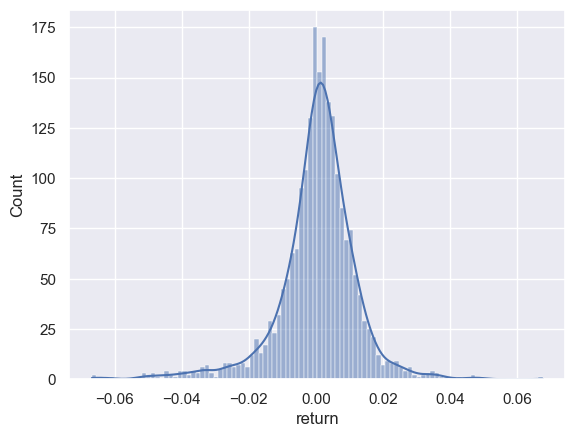

In [ ]:
sns.histplot(df_VNINDEX_stage_3['return'], bins=100, kde=True)

Less pointy but still fat tailed.

In [ ]:
# Variance
print(f"Variance of Return: {df_VNINDEX_stage_3['return'].var()*100:.4f}%")
# Skewness
print(f"Skewness of Return: {df_VNINDEX_stage_3['return'].skew():.2f}")
# Kurtosis
print(f"Kurtosis of Return: {df_VNINDEX_stage_3['return'].kurtosis():.2f}")

Variance of Return: 0.0141%
Skewness of Return: -0.92
Kurtosis of Return: 5.18


Lower variance and close to 0 skewness, less outliers.  
Kurtosis = 5, still leptokurtic but not too extreme.

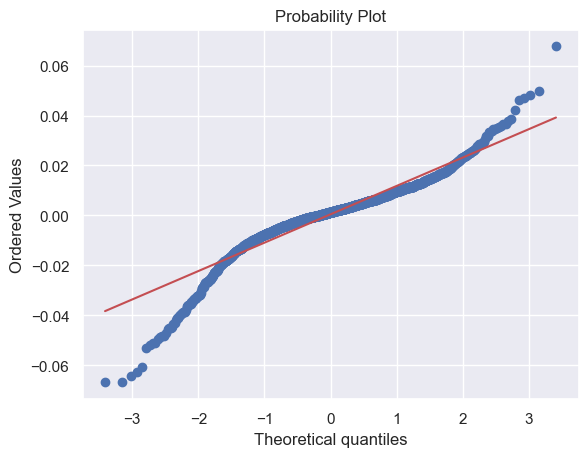

In [ ]:
# Q-Q plot
stats.probplot(df_VNINDEX_stage_3['return'], dist="norm", plot=plt)
plt.show()

Clearer heavy-tailed shown, less outliers, still bell-shaped.

In [ ]:
# Sharpe ratio
sr_VNINDEX = (df_VNINDEX_stage_3['return'].mean() - rf) / df_VNINDEX_stage_3['return'].std()
print(f"Sharpe ratio: {sr_VNINDEX:.2f}")
# Sortino ratio
sr_VNINDEX = (df_VNINDEX_stage_3['return'].mean() - rf) / df_VNINDEX_stage_3[df_VNINDEX_stage_3['return'] < 0]['return'].std()
print(f"Sortino ratio: {sr_VNINDEX:.2f}")
# Max drawdown (MDD)
MDD_VNINDEX = ((df_VNINDEX_stage_3['close'].cummax() - df_VNINDEX_stage_3['close'])/df_VNINDEX_stage_3['close'].cummax()).max()
print(f'MDD ratio: {MDD_VNINDEX*100:.2f}%')

Sharpe ratio: 0.04
Sortino ratio: 0.04
MDD ratio: 45.26%


No risk adjusted return, not efficiently risk handled.  
MDD ratio still very high.

In [ ]:
# ADF
adf_result = adfuller(df_VNINDEX_stage_3['return'])
print(f"ADF test: {adf_result[1]}")

print()

# KPSS
kpss_result = kpss(df_VNINDEX_stage_3['return'], regression='c')
print(f"KPSS test: {kpss_result[1]}")

ADF test: 0.0

KPSS test: 0.1


The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.



Definitely stationary => ARCH/GARCH

In [ ]:
# ADF
adf_result = adfuller(df_VNINDEX_stage_3['close'])
print(f"ADF test: {adf_result[1]}")

print()

# KPSS
kpss_result = kpss(df_VNINDEX_stage_3['close'], regression='c')
print(f"KPSS test: {kpss_result[1]}")

ADF test: 0.7582746697460425

KPSS test: 0.01


The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.



Same as full data: non-statuonary unit root, non-stationary trend => Definitely not stationary. Price still very hard to model with regressive model.

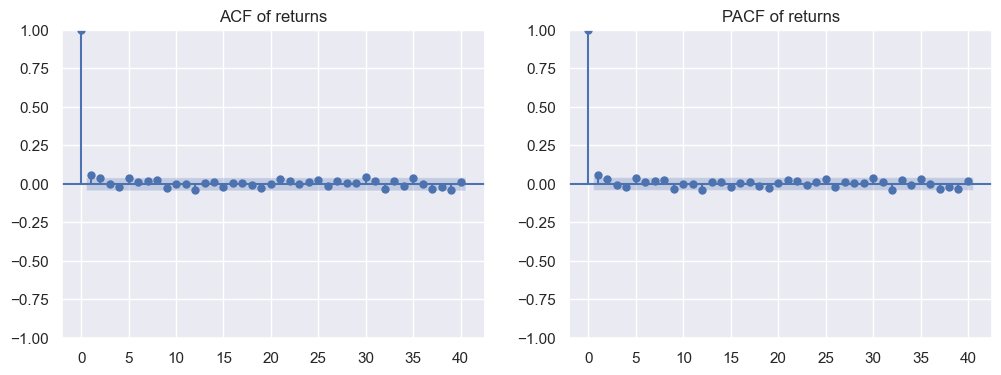

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plot_acf(df_VNINDEX_stage_3['return'], lags=40, ax=axes[0])
axes[0].set_title('ACF of returns')
plot_pacf(df_VNINDEX_stage_3['return'], lags=40, ax=axes[1])
axes[1].set_title('PACF of returns')
plt.show()

Still mean reversion patterns, no meaningful AR structure.

In [ ]:
mu = df_VNINDEX_stage_3['return'].mean()
sigma = df_VNINDEX_stage_3['return'].std()

confidence = 0.95 # 95% confidence level
z = stats.norm.ppf((1 - confidence)) #z-score for 5% left tail (point where 5% falls below)

VaR_95 = mu + sigma * z
print(f"Parametric 95%: {VaR_95*100:.2f}%")

# Histrorical Simulation
Var_95_hist = np.percentile(df_VNINDEX_stage_3['return'], 5) # 5% quantile
print(f"Historical 95%: {Var_95_hist*100:.2f}%")

# Mont Carlo simulation
np.random.seed(42)
simulated = np.random.normal(mu, sigma, size=10000)
VaR_95_mc = np.percentile(simulated, 5)
print(f"Monte Carlo 95% VaR: {VaR_95_mc*100:.2f}%")

Parametric 95%: -1.91%
Historical 95%: -1.93%
Monte Carlo 95% VaR: -1.92%


Much more stable results, both history and normal assumption show close to 1.92% worse lost.

In [ ]:
# CVaR
alpha = 5 # 5% worst-case
CVaR_95 = df_VNINDEX_stage_3[df_VNINDEX_stage_3['return'] <= VaR_95]['return'].mean()
print(f"95% CVaR: {CVaR_95*100:.2f}%")

95% CVaR: -3.25%


In [ ]:
threshold = np.percentile(df_VNINDEX_stage_3['return'], 5) # Worst 5%
extreme_losses = df_VNINDEX_stage_3[df_VNINDEX_stage_3['return'] <= threshold]['return']

print(f"Tail sample size: {len(extreme_losses)}")
print(f"Tail mean: {extreme_losses.mean()*100:.2f}%") 
print(f"Max loss observed: {extreme_losses.min()*100:.2f}%")

Tail sample size: 108
Tail mean: -3.28%
Max loss observed: -6.68%


Much lower risk mean and close to normal distribution assumed model.

In [ ]:
# Day-of-week effect
df_VNINDEX_stage_3['time'] = pd.to_datetime(df_VNINDEX_stage_3['time'])
df_VNINDEX_stage_3['day_of_week'] = df_VNINDEX_stage_3['time'].dt.day_name()

day_mean = df_VNINDEX_stage_3.groupby('day_of_week')['return'].agg(['mean', 'count']).sort_values(by='mean',ascending=False)
day_mean


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,mean,count
day_of_week,,
Wednesday,0.001766,432
Tuesday,0.001073,432
Friday,0.000548,434
Thursday,0.000052,434
Monday,-0.001157,419


Same pattern as full data, this is still a very good indicator.

So use stage 3 data for much more stable patterns and assumptions.